In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import seaborn as sns
import load_data as ld
import classes as cl

In [5]:
# Load simple data
X, y = ld.load_simple_data(100, 0)

# Initial beta
beta_init = f.beta_OLS(X, y)

# Hyperparameters
learning_rate = 0.01
epochs = 100

In [6]:

gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='adam', gradient_method='jax', lambda_param=0.1)
optimized_gd_beta = gd.optimize()

sgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='adam', gradient_method='jax')
optimized_sgd_beta = sgd.optimize()

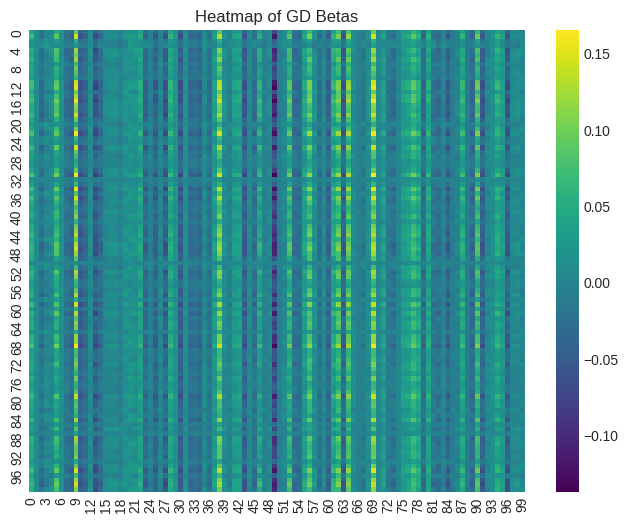

In [13]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(optimized_gd_beta, cmap="viridis", cbar=True)

# Show the plot
plt.title("Heatmap of GD Betas")
plt.show()

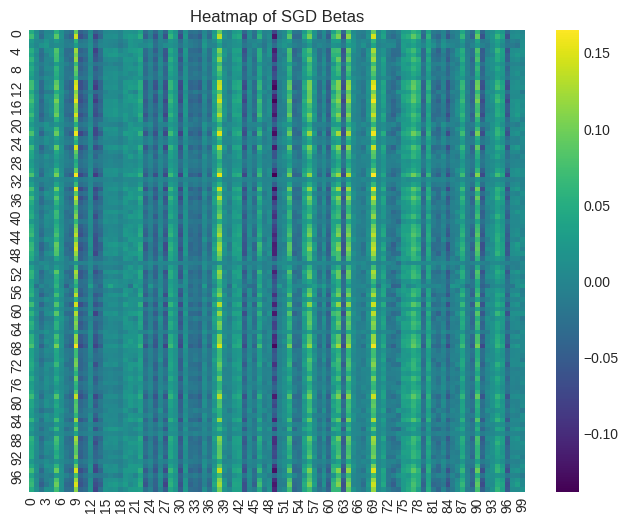

In [14]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(optimized_sgd_beta, cmap="viridis", cbar=True)

# Show the plot
plt.title("Heatmap of SGD Betas")
plt.show()